In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
%config InlineBackend.figure_format ='retina'

In [36]:
plt.style.use("https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle")
plt.rcParams["figure.figsize"] = (12, 6)

In [37]:
from aleatory.processes import GBM

In [38]:
t0price = 185.0

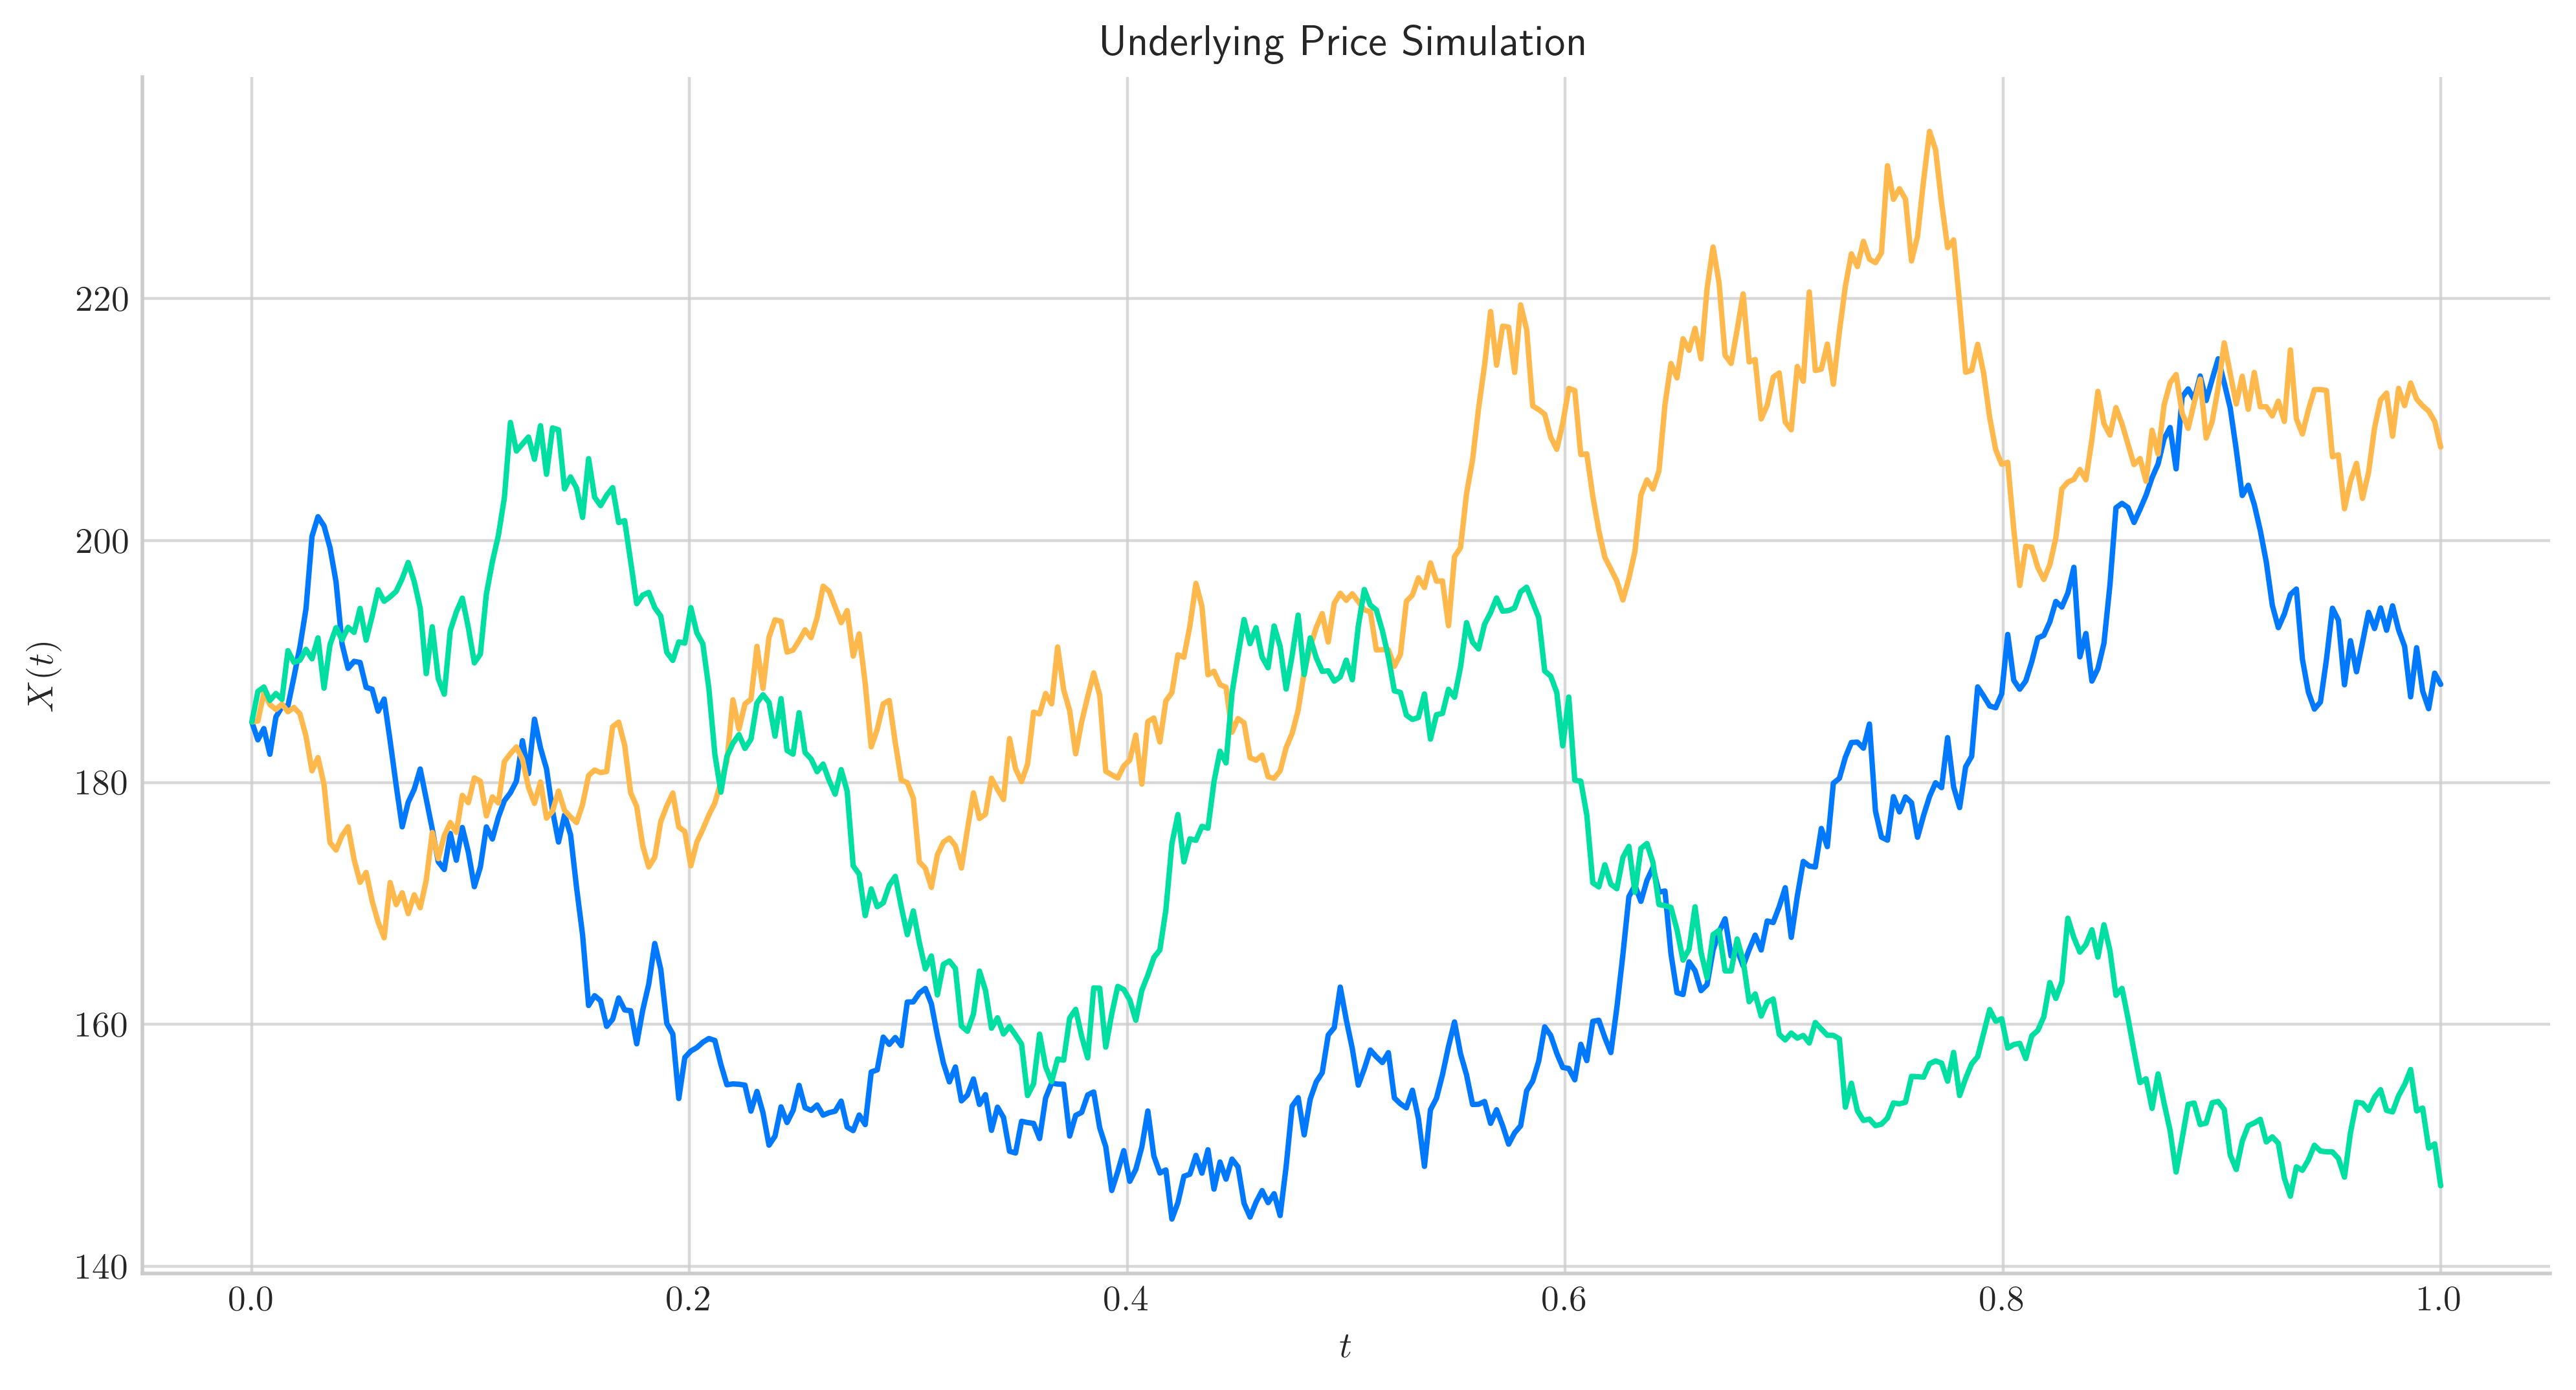

In [39]:
asset = GBM(initial=t0price,drift=0.05, volatility=0.25,T=1)
asset.plot(N=3, n=365,  title='Underlying Price Simulation')
plt.show()

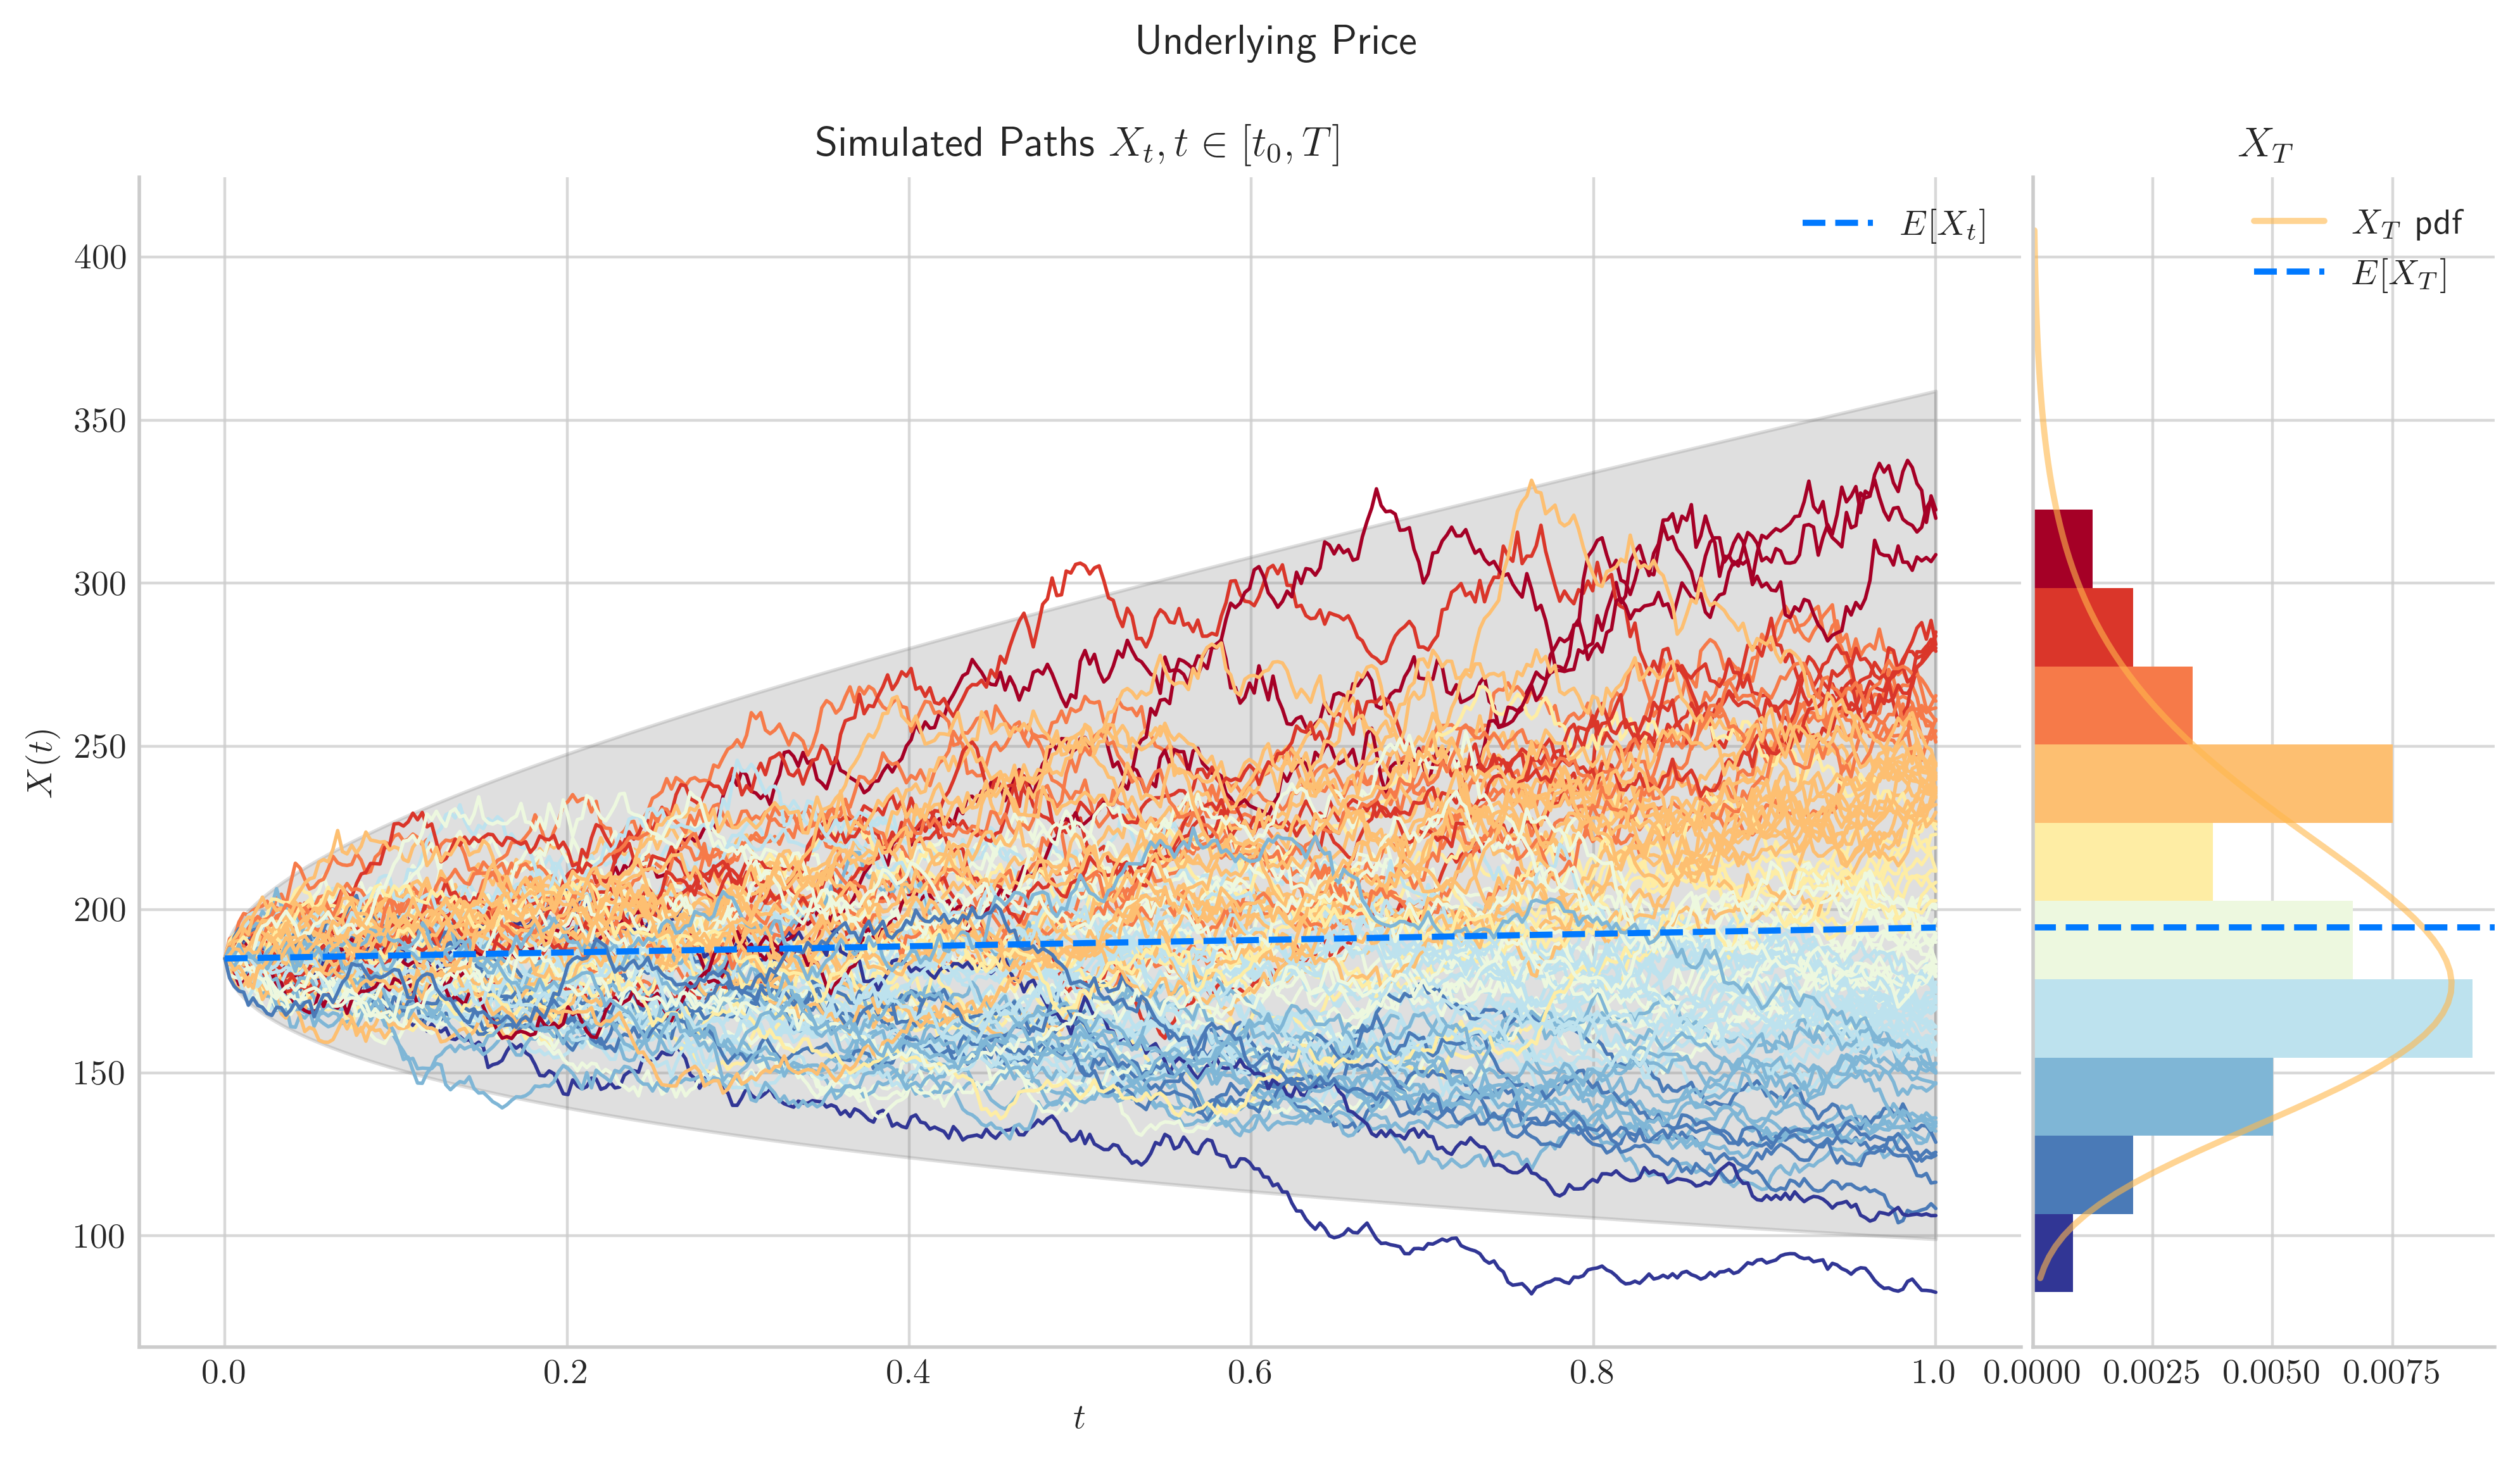

In [40]:
asset.draw(N=100, n=365, envelope=True, title='Underlying Price')
plt.show()

In [41]:
t0price

185.0

In [42]:
 asset.marginal_expectation(1.0)

194.48515282956447

In [43]:
asset.marginal_variance(1.0)

2439.469027767387

In [44]:
K=195.0

In [45]:

def make_graph(days= 360, t=150, K=K, N=3, asset=asset):
    times = np.linspace(0, 1, days)
    paths = [ asset.sample_at(times) for _ in range(N)]
    
    greater = [any(i >= K for i in path[0:t]) for path in paths]
    
    colors = [ 'green' if g else 'gray' for g in greater ]
    plt.figure(figsize=(8, 4), dpi=100)   
    for path, color in zip(paths, colors):
        plt.plot(times, path, color=color)
    plt.hlines(y=K, xmin = 0, xmax=1, colors='red', label=f'K={K}')
    plt.axvline(x=t/days, label='t')
    plt.title('Asset Price Simulation')
    plt.legend()
    plt.show()


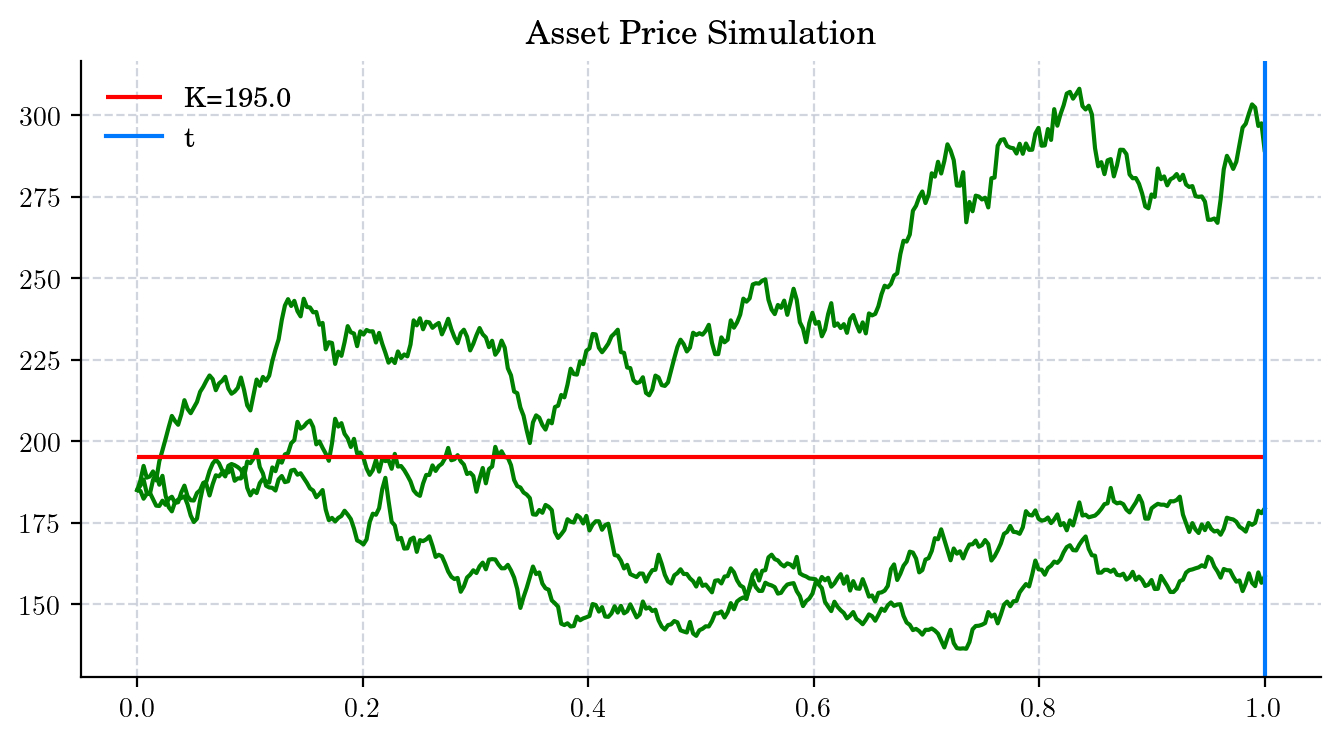

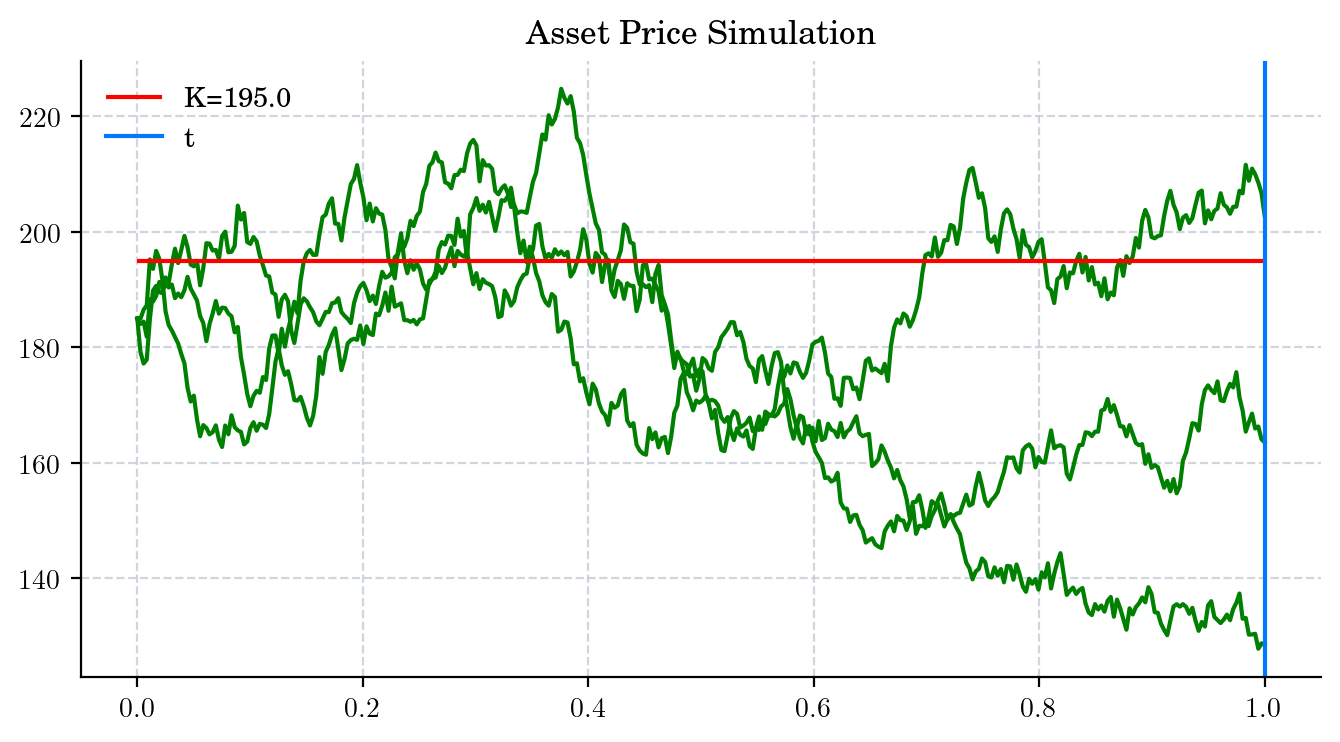

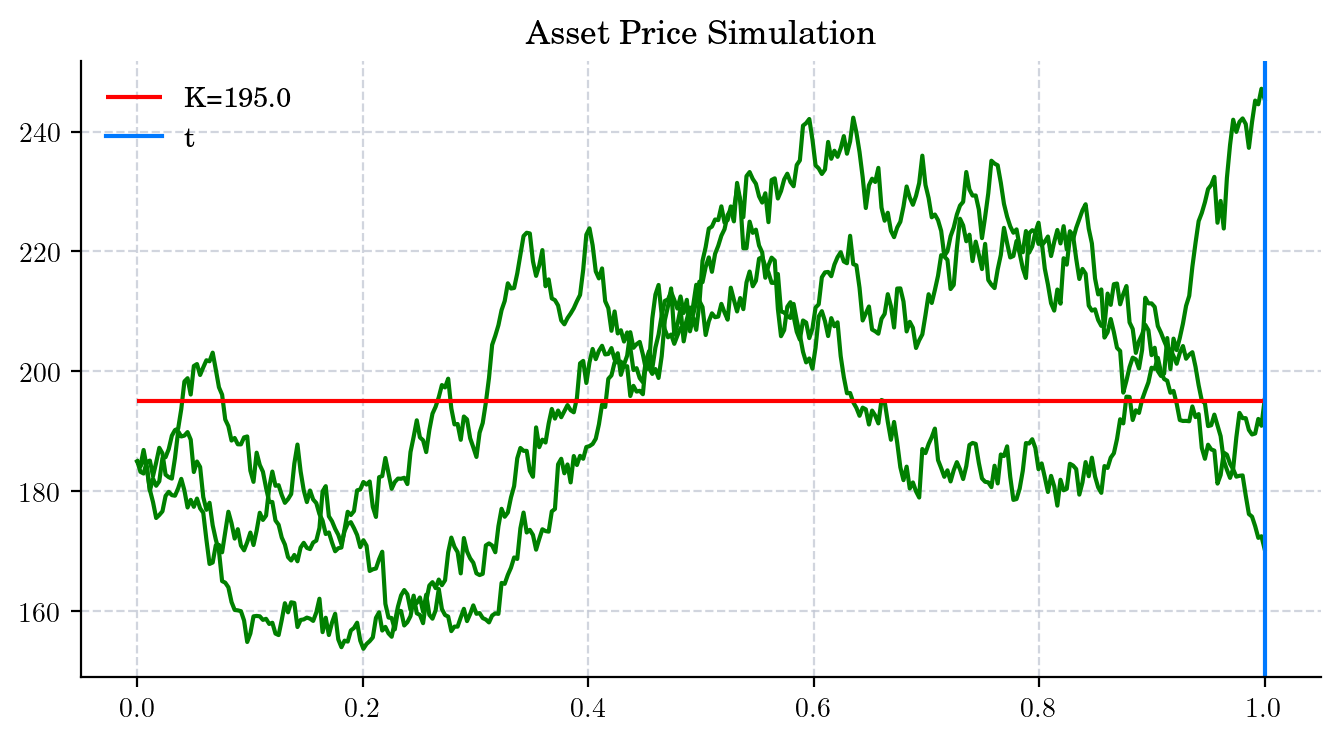

In [46]:
for i in range(3):
    make_graph(t=360)

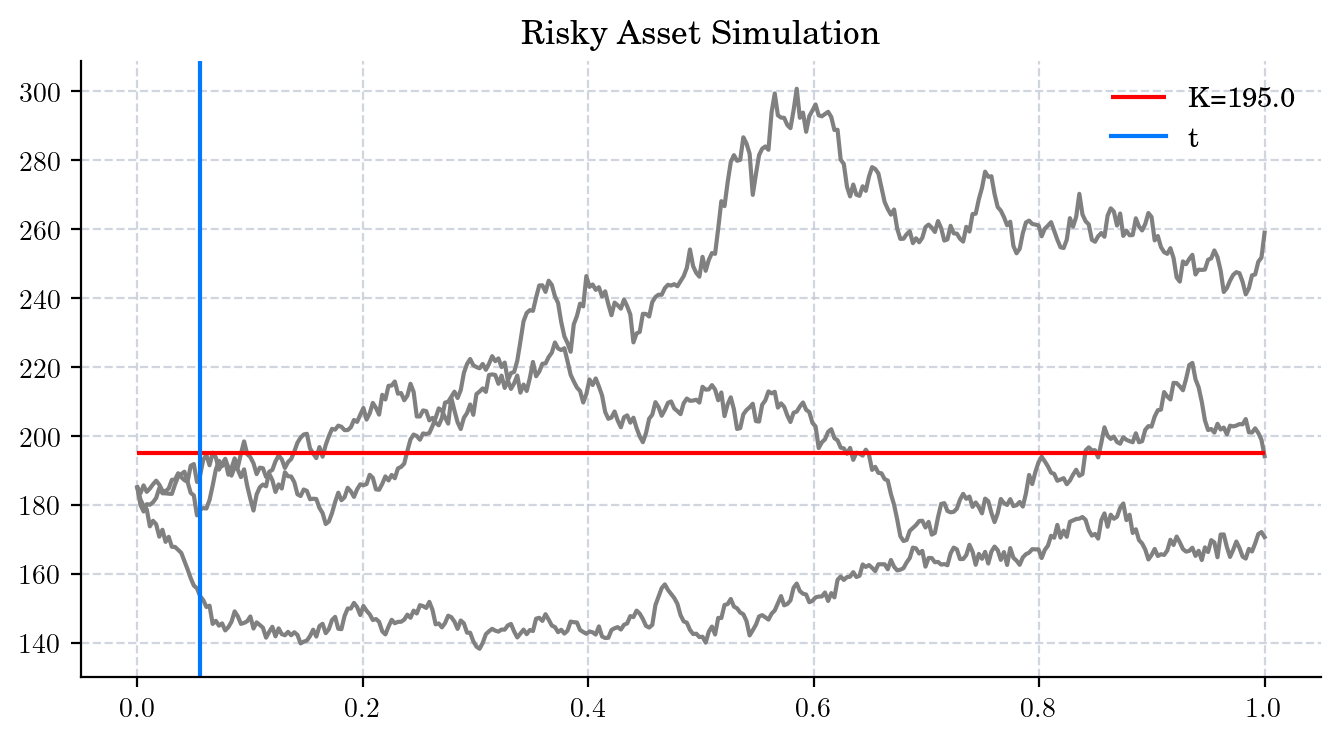

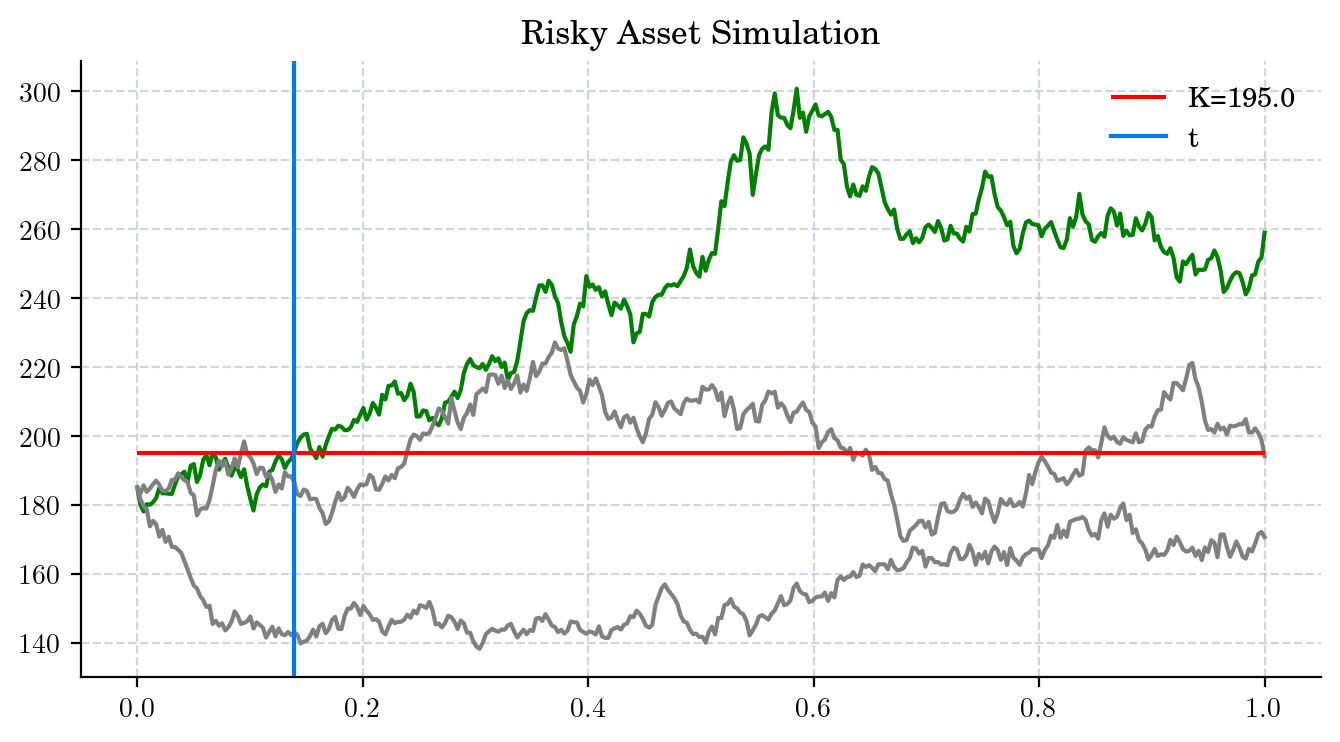

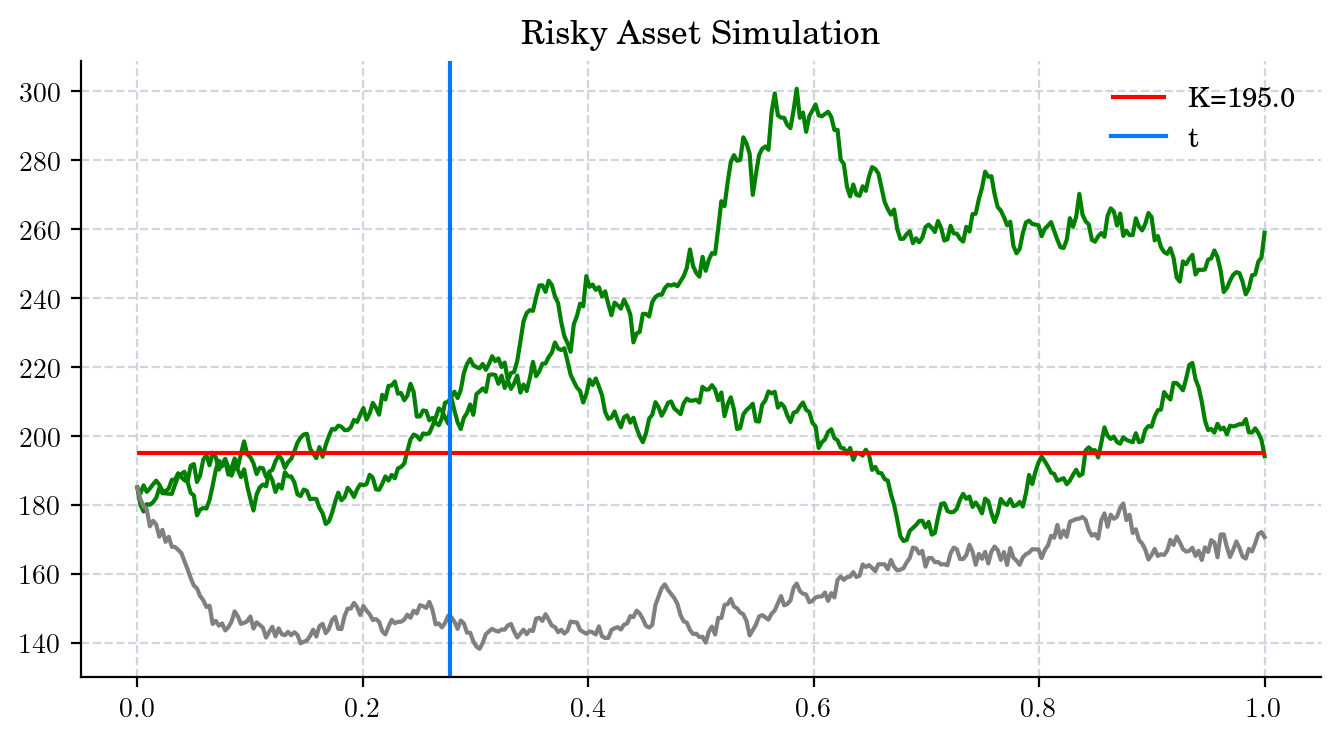

In [52]:
times = np.linspace(0, 1, 360)
paths = [ asset.sample_at(times) for _ in range(3)]

def make_graph1(paths, days = 360, t=125, K=K, N=3):
    # greater = [any(i >= K for i in path[0:t]) for path in paths]
    greater = [path[t] >=K for path in paths]
    colors = [ 'green' if g else 'gray' for g in greater ]
    plt.figure(figsize=(8, 4), dpi=100)   
    for path, color in zip(paths, colors):
        plt.plot(times, path, color=color)
    plt.hlines(y=K, xmin = 0, xmax=1, colors='red', label=f'K={K}')
    plt.axvline(x=t/days, label='t')
    plt.title('Risky Asset Simulation')
    plt.legend()
    plt.show()
    
for t in [20,50,100]:
    make_graph1(paths=paths, t=t)